#### MLF_GP1_CreditScore
MLF_GP1_CreditScore contains 1700 observations of 26 financial and accounting metrics changes for a set of firms in several different industries.
The Class label is the Moody's credit rating assigned to the firm in the following quarter.  Certain ratings are considered "Investment Grade" (=1), other ratings are not (=0) and consequently may not be held in certain institutional portfolios (pension plans, etc.) 


#### Background

Credit rating is a highly concentrated industry with the "Big Three" credit rating agencies – Fitch Ratings, Moody's and Standard & Poor's (S&P) – controlling approximately 95% of the ratings business.

For a financial institution, ratings are developed based on specific **intrinsic and external** influences.

Requires that Moody's particularly endeavor to avoid "false" negative predictions

Moody’s ratings are opinions of future relative creditworthiness, derived by **fundamental credit analysis** and
expressed through the familiar Aaa-C symbol system. Fundamental credit analysis incorporates an evaluation of *franchise value, financial statement analysis, and management quality*. It seeks to predict the credit
performance of bonds, other financial instruments, or firms across a range of plausible economic scenarios,
some of which will include credit stress. 

Credit ratings are usually **updated quarterly** with an assessment of the entity's most recent financial status. Annual updates most often accompany a lengthier analysis.

In [50]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
MLF_GP1 = pd.read_csv("MLF_GP1_CreditScore.csv")
MLF_GP1.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [3]:
sum_of_nullValues = np.sum(MLF_GP1.isna().sum() != 0)
if sum_of_nullValues == 0:
    print("There isn't any null values in this data frame")

There isn't any null values in this data frame


In [4]:
print("Number of Rows of Data = ", MLF_GP1.shape[0])
print("Number of Columns of Data = ", MLF_GP1.shape[1])

Number of Rows of Data =  1700
Number of Columns of Data =  28


In [5]:
# Check the types of the data
MLF_GP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [6]:
print("The number of unique values for each column is:")
print(MLF_GP1.nunique())

The number of unique values for each column is:
Sales/Revenues              1624
Gross Margin                1658
EBITDA                      1650
EBITDA Margin               1669
Net Income Before Extras    1601
Total Debt                  1524
Net Debt                    1527
LT Debt                     1495
ST Debt                     1516
Cash                        1517
Free Cash Flow              1520
Total Debt/EBITDA           1660
Net Debt/EBITDA             1663
Total MV                    1700
Total Debt/MV               1700
Net Debt/MV                 1700
CFO/Debt                    1525
CFO                         1516
Interest Coverage           1662
Total Liquidity             1525
Current Liquidity           1525
Current Liabilities         1491
EPS Before Extras           1525
PE                          1700
ROA                         1607
ROE                         1609
InvGrd                         2
Rating                        16
dtype: int64


In [7]:
# Summary Statistics for Attributes and Label
MLF_GP1.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [8]:
name_list = []
counts = []
for i in MLF_GP1['Rating']:
    if i in name_list:
        counts[name_list.index(i)] += 1
    else:
        name_list.append(i)
        counts.append(1)
order = ['Aaa', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 'Baa1', 'Baa2', 'Baa3',
         'Ba1', 'Ba2', 'Ba3', 'B1', 'B2', 'B3', 'Caa1']
counts_new = []
for i in range(len(order)):
    counts_new.append(counts[name_list.index(order[i])])

In [9]:
inv = np.sum(np.array(counts_new)[:9])
junk = np.sum(np.array(counts_new)[9:])
print("There are a total of {} obseravtaions are investment grade.".format(inv))
print("There are a total of {} obseravtaions are junk grade.".format(junk))

There are a total of 1287 obseravtaions are investment grade.
There are a total of 413 obseravtaions are junk grade.


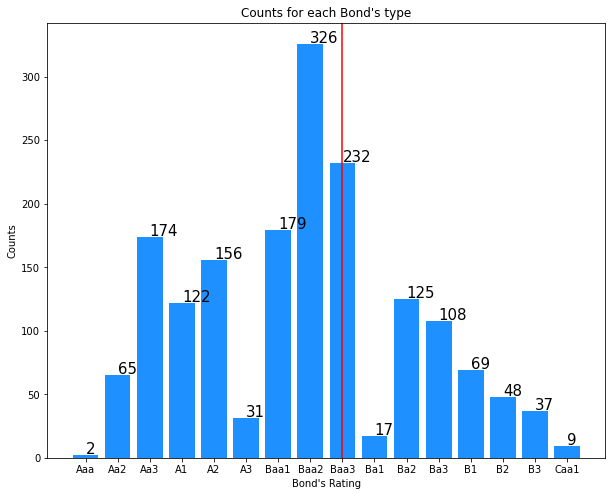

In [10]:
plt.figure(figsize = (10, 8))
plt.bar(order, counts_new, color = 'dodgerblue')
for index,data in enumerate(counts_new):
    plt.text(x = index , y = data + 1 , 
             s = f"{data}" , fontdict = dict(fontsize = 15))
plt.axvline(x = 'Baa3', color = 'red')
plt.xlabel("Bond's Rating")
plt.ylabel("Counts")
plt.title("Counts for each Bond's type")
plt.show()

<font color=blue>The target variable Rating does not have balanced classes.</font>

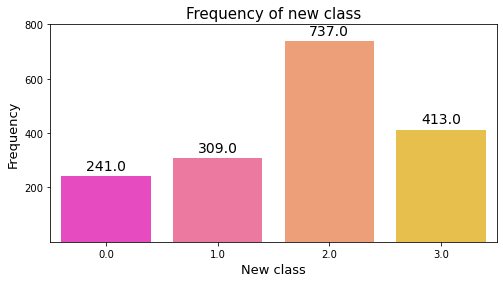

In [11]:
y_Rating = MLF_GP1['Rating'].copy()
first_class = ['Aaa', 'Aa2', 'Aa3']
second_class = ['A1', 'A2', 'A3']
third_class = ['Baa1', 'Baa2', 'Baa3']
fourth_class = ['Ba1', 'Ba2', 'Ba3', 'B1', 'B2', 'B3', 'Caa1']
multiRating = np.zeros(len(y_Rating))
for i in range(len(y_Rating)):
    if y_Rating[i] in first_class:
        multiRating[i] = 0
    elif y_Rating[i] in second_class:
        multiRating[i] = 1
    elif y_Rating[i] in third_class:
        multiRating[i] = 2
    elif y_Rating[i] in fourth_class:
        multiRating[i] = 3
        
df = MLF_GP1.copy()
df['multiRating'] = multiRating    
# bar plot of multiRating
value_counts = df['multiRating'].value_counts()
class_counts = pd.DataFrame({'Class': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize = (8,4))
g = sns.barplot(x = 'Class', y = 'value_count', data = class_counts, capsize = 0.3, palette = 'spring')
g.set_title("Frequency of new class", fontsize = 15)
g.set_xlabel("New class", fontsize = 13)
g.set_ylabel("Frequency", fontsize = 13)
g.set_yticks([200, 400, 600, 800])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha = 'center', va = 'center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [12]:
# Store the features in dataframe X
X = MLF_GP1[MLF_GP1.columns.values[:-2]]

# Standardize the features
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.values)
X_std.shape

(1700, 26)

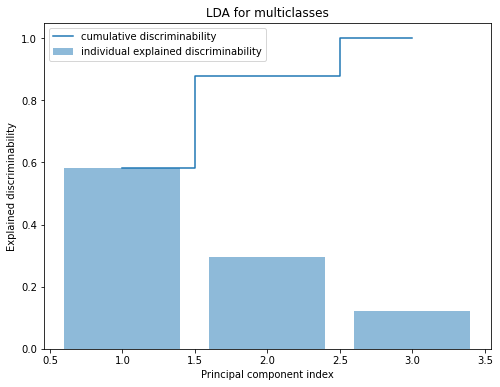

In [13]:
LDA = LinearDiscriminantAnalysis().fit(X_std, multiRating)
linear_discriminants = LDA.explained_variance_ratio_

plt.figure(figsize = (8,6))
cum_seperation = np.cumsum(linear_discriminants)
plt.bar(range(1,4), linear_discriminants, alpha = 0.5, align = 'center',
         label='individual explained discriminability')
plt.step(range(1,4), cum_seperation, where='mid',
        label='cumulative discriminability')
plt.ylabel('Explained discriminability')
plt.xlabel('Principal component index')
plt.title("LDA for multiclasses")
plt.legend(loc='best')
plt.show()

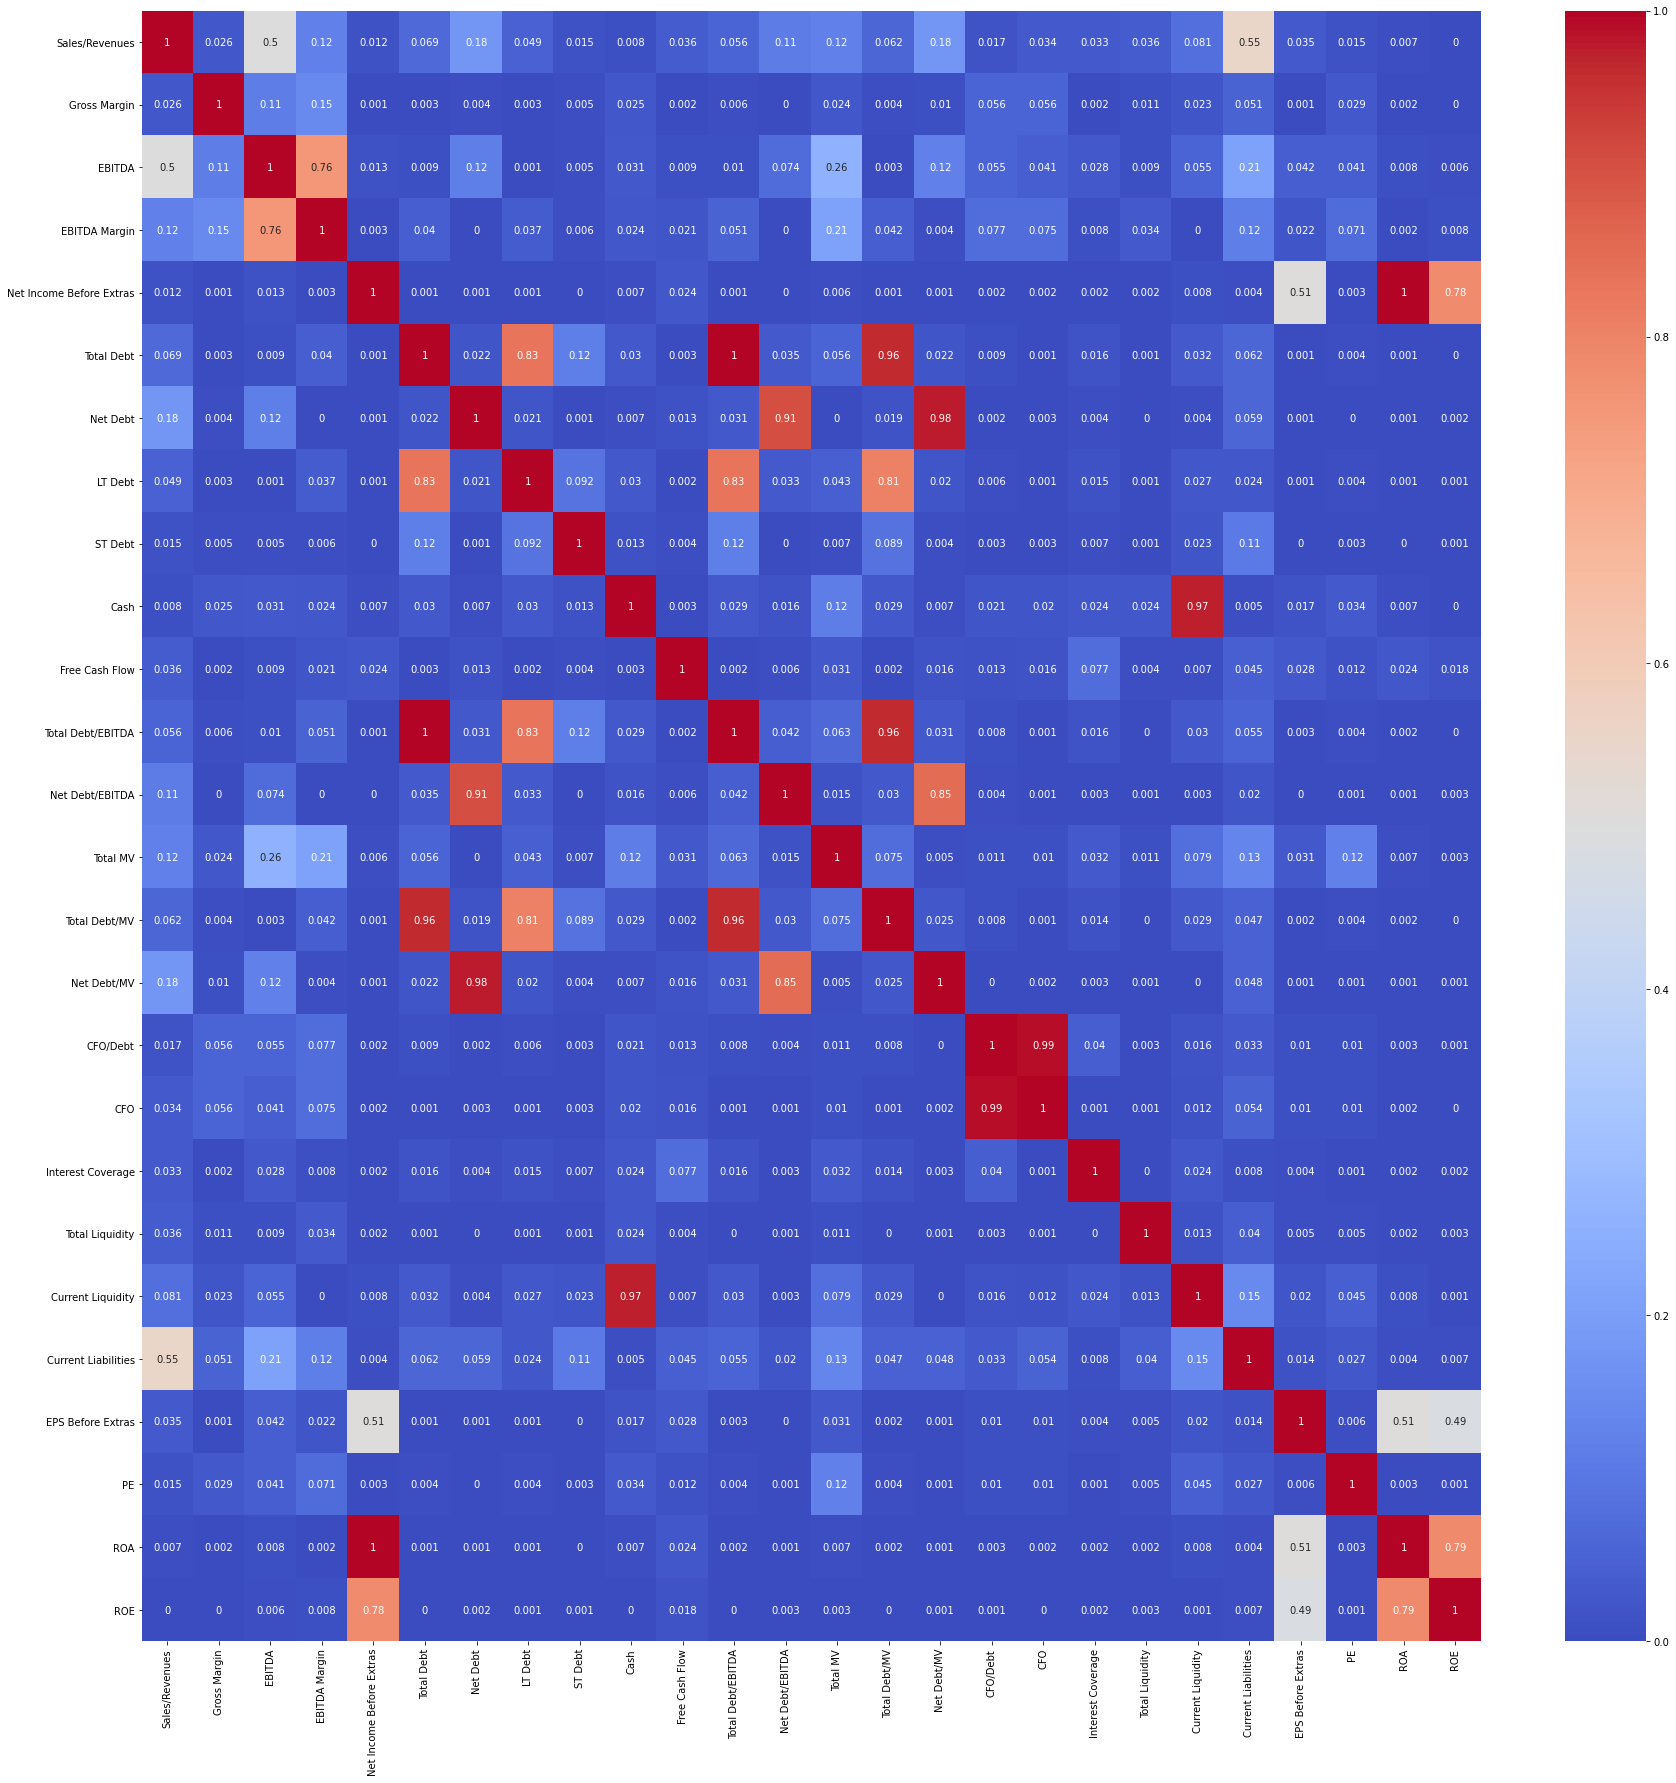

In [14]:
# Plot the absolute value of the corr heatmap
corr_matrix = X_std.corr().abs().round(3)
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

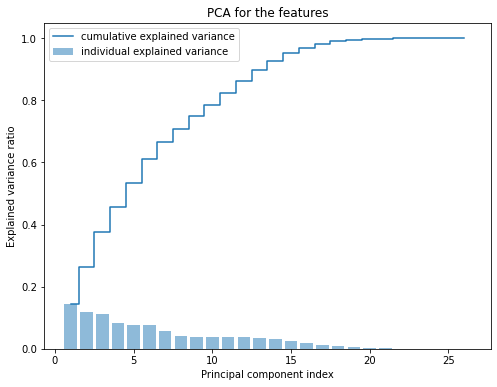

In [15]:
plt.figure(figsize = (8,6))
cov_mat = np.cov(X_std.values.T)
eigen_vals, eigen_vecs = la.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
            sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,27), var_exp, alpha=0.5, align='center',
         label='individual explained variance')
plt.step(range(1,27), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA for the features")
plt.legend(loc='best')
plt.show()

<font color=blue>For binary class classification task, it might be a good idea to use PCA transformation since 16 PCs can explain a large portion of the variance of the original dataset. </font>